In [1]:
import ROOT as rt
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd
from root_numpy import array2tree


import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/storage/af/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from helper_functions import deltaR, deltaPhi
import numpy as np
from scipy.stats import norm
import math
import CMS_lumi, tdrstyle
a= tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0



print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [2]:
fpath =OrderedDict()
tree = OrderedDict()


start_t = time.time()
data_year = 'full'

v1 = 'V1p17'


v2 = '/v5/v135'
v2 = '/v5/v140'
# v2 = '/v5/v137'

v2 = '/v5/v146'

# v2 = '/v5/v155'
v2 = '/v5/v158'
v2 = '/v5/v179'
v2 = '/v5/v188' # fixed timeWeighted and muon veto




if data_year == 2016:
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2016/'+v2+'/normalized/'
    fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2016_Run2016-HighMET-07Aug17_goodLumi.root'
elif data_year == 2017:
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2017/'+v2+'/normalized/'
    fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2017_Run2017-HighMET-17Nov2017_goodLumi.root'
elif data_year == 2018:
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2018/'+v2+'/normalized/'
    fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2018_17Sept2018_Run2018-HighMET-17Sep2018_goodLumi.root'
else: #2016, 2017, 2018AB
    data_path = '/storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+v1+'/Data2018/'+v2+'/normalized/'
    fpath['data'] = data_path + 'Run2_displacedJetMuonNtupler_'+v1+'_Data2016_Data2017_Data2018-HighMET_goodLumi.root'


NEvents = {}
for k,v in fpath.items():
    print (k, v)
    root_dir = uproot.open(v) 

    tree[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    a = tree[k]["weight"].array()
    
    print("NEvents",NEvents[k])

data /storage/af/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2018//v5/v188/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-HighMET_goodLumi.root
NEvents 22763250.0


# load variables

In [25]:

JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 90
jetPt_cut = 50
tightid = False
ring_cut = 50

cut_based = True
cut_based_version = 'v4'

intime = True
DPHI_CUT = 1


gLLP_csc = {}

nCscClusters = {}
selections_cluster = {}
sel_cluster = {}
met = {}
metPhi = {}

jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
cscClusterTimeSpread = {}
bdt_score = {}
nCscChambers = {}
a = {}
b = {}
c = {}
d = {}
sel_ev = {}
cluster_index = ''
nRings = {}
nLeptons= {}
cscRechitClusterMuonVetoPt = {}
cscRechitClusterJetVetoPt = {}

cscRechitClusterTime = {}
cscRechitClusterPhi = {}
cscRechitClusterEta = {}
cscClusterSize = {}
cscRechitClusterNStation = {}
cscRechitClusterMaxStation = {}
cscRechitClusterDPhiMet = {}
cscRechitClusterMe11Ratio = {}
cscRechitClusterMe12Ratio = {}
cscRechitClusterMe11 = {}
cscRechitClusterMe12 = {}
cscRechitClusterDphi = {}

deltaRCluster = {}
nDtSectors = {}
metPhi = {}
nCscClusters = {}
nDtClusters = {}
evtNum = {}
runNum = {}
lumiNum = {}
dtRechitClusterDphi = {}
nDtWheels25 = {}
nDTRechitsNoiseSec7 = {}
nDTRechitsNoiseSec8 = {}
nDTRechitsNoiseSec9 = {}
nDTRechitsNoiseSec10 = {}
nDtStations25 = {}


dtRechitClusterDPhiMet = {}
dtRechitClusterNSegmentStation1 = {}
dtRechitClusterNSegmentStation2 = {}
dtRechitClusterNSegmentStation3 = {}
dtRechitClusterNSegmentStation4 = {}
dtRechitClusterMuonVetoPt = {}
dtRechitClusterJetVetoPt = {}
dtRechitClusterPhi = {}
dtRechitClusterEta = {}
dtClusterSize = {}
dtRechitClusterTime = {}
dtRechitClusterNStation = {}
dtRechitClusterDPhiMet = {}
dtRechitClusterMaxStation = {}
dtRechitClusterMaxStationRatio = {}
dtRechitClusterNOppositeSegStation1 = {}
dtRechitClusterNOppositeSegStation2 = {}
dtRechitClusterNOppositeSegStation3 = {}
dtRechitClusterNOppositeSegStation4 = {}
dtRechitClusterMuonVetoLooseId = {}
nCosmic = {}
cosmicTwoLegClusterChi2Reduced = {}
cosmicTwoLegCluster2NStation = {}
cosmicTwoLegCluster1NStation = {}
cosmicTwoLegCluster2Index = {}
cosmicTwoLegCluster1Index = {}
cscRechitClusterNSegmentStation1 = {}
cscRechitClusterNSegmentStation2 = {}
cscRechitClusterNSegmentStation3 = {}
cscRechitClusterNSegmentStation4 = {}
cscRechitClusterMuonVetoLooseId = {}
dtRechitClusterNSegStation1 = {}
dtRechitClusterNSegStation2 = {}
dtRechitClusterNSegStation3 = {}
dtRechitClusterNSegStation4 = {}
cscRechitClusterMuonVetoGlobal = {}
cscRechitClusterMuonVetoLooseId = {}
dtRechitClusterMuonVetoGlobal = {}
dtRechitClusterMuonVetoLooseId = {}
dtRechitCluster_match_RPChits = {}
dtRechitClusterMetEENoise_dPhi = {}
dtRechitClusterZ = {}
clusterDphi = {}
nMe11 = {}
nJets = {}
deltaRCluster = {}
jetMet_dPhiMin = {}
jetPt = {}
cond = {}
category = 2
#2csc, 2dt, 1csc+1dt
region = 'signal'
# region = 'control'
# region = 'punchthrough'
for k, T in tree.items():
        
    ########### SELECTION: CLUSTERS ############
      
   
    sel_csccluster = np.logical_and(T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') < 12.5, \
                                                                         T.array('cscRechitCluster' + cluster_index + 'TimeWeighted') > -5)

    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')<20)
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')<30)
#     sel_csccluster = np.logical_and(sel_csccluster, np.logical_not(np.logical_and(T.array('cscRechitClusterMuonVetoPt') >= 30, T.array('cscRechitClusterMuonVetoGlobal'))))
    sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitClusterGlobalMuonVetoPt') < 30)


    if region == 'control': sel_csccluster = np.logical_and(sel_csccluster, np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))>=1.2)
    elif region == 'signal': sel_csccluster = np.logical_and(sel_csccluster, np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))<1.2)
    if region == 'punchthrough':sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')>=1.0)
    else: sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')<1.0)

    
    sel_dtcluster = np.abs(T.array('dtRechitClusterJetVetoPt')) < 50
#     sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(T.array('dtRechitClusterMuonVetoPt') >= 10, T.array('dtRechitClusterMuonVetoLooseId'))))
    sel_dtcluster = np.logical_and(sel_dtcluster, T.array('dtRechitClusterLooseIdMuonVetoPt') < 10)


    cut = 5
    station = (T.array('dtRechitClusterNSegmentStation1')>cut).astype(int)+(T.array('dtRechitClusterNSegmentStation2')>cut).astype(int)\
+(T.array('dtRechitClusterNSegmentStation3')>cut).astype(int)+(T.array('dtRechitClusterNSegmentStation4')>cut).astype(int)

    max_station = np.maximum(np.maximum(np.maximum(T.array('dtRechitClusterNSegmentStation1'), T.array('dtRechitClusterNSegmentStation2')), T.array('dtRechitClusterNSegmentStation3')), T.array('dtRechitClusterNSegmentStation4'))
    min_station = np.minimum(np.minimum(np.minimum(T.array('dtRechitClusterNSegmentStation1'), T.array('dtRechitClusterNSegmentStation2')), T.array('dtRechitClusterNSegmentStation3')), T.array('dtRechitClusterNSegmentStation4'))

    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_or(station<4, min_station/max_station<0.4)) #remove if both clusters are 4 stations

    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(T.array('dtRechitClusterNoiseVeto'))) #remove if both clusters are 4 stations


#     noise_2016 = np.logical_and(T.array('dtRechitClusterMaxStation') == 2, T.array('dtRechitClusterWheel') == 1)
#     noise_2016 = np.logical_and(noise_2016, T.array('dtRechitClusterPhi') > math.pi/12)
#     noise_2016 = np.logical_and(noise_2016, T.array('dtRechitClusterPhi') < math.pi/4)
#     sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(noise_2016))
    
    if region == 'punchthrough':sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_and(T.array('dtRechitClusterMaxStation')==1, T.array('dtRechitClusterMaxStationRatio')>=0.9))
    else:sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(T.array('dtRechitClusterMaxStation')==1, T.array('dtRechitClusterMaxStationRatio')>=0.9)))

    if region == 'control': sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterMetEENoise_dPhi')) >= 1)
    elif region == 'signal': sel_dtcluster = np.logical_and(sel_dtcluster, np.abs(T.array('dtRechitClusterMetEENoise_dPhi')) < 1)


     ###################### cosmic muon veto #############
    sel_cosmic = np.logical_and(T.array('dtRechitClusterNOppositeSegStation1')>0, T.array('dtRechitClusterNOppositeSegStation2')>0)
    sel_cosmic = np.logical_and(sel_cosmic, T.array('dtRechitClusterNOppositeSegStation3')>0)
    sel_cosmic = np.logical_and(sel_cosmic, T.array('dtRechitClusterNOppositeSegStation4')>0)
    sel_cosmic = np.logical_and(sel_cosmic, T.array('dtRechitClusterNOppositeSegStation1')+T.array('dtRechitClusterNOppositeSegStation2')+\
                               T.array('dtRechitClusterNOppositeSegStation3')+T.array('dtRechitClusterNOppositeSegStation4')>=6)
    nstation = (T.array('dtRechitClusterNSegmentStation1')>1).astype(int)+(T.array('dtRechitClusterNSegmentStation2')>1).astype(int)\
    +(T.array('dtRechitClusterNSegmentStation3')>1).astype(int)+(T.array('dtRechitClusterNSegmentStation4')>1).astype(int)
    
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(nstation>=3, sel_cosmic)))
    print(np.count_nonzero(sel_dtcluster.sum()))

########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > 30, np.abs(T.array('jetEta')) < 2.4 )
    sel_jet = np.logical_and(sel_jet, T.array('jetTightPassId'))

            
########### SELECTION: SPIKE IN DT ############
    
    spike = np.logical_and( T.array('nDTRechitsSector')[:,0,0,7]>50,  T.array('nDTRechitsSector')[:,0,0,7]+T.array('nDTRechitsSector')[:,0,0,8]+T.array('nDTRechitsSector')[:,0,0,9]>120)
    spike = np.logical_and(spike, T.array('nDTRechitsSector')[:,0,0,8]>25)
    spike = np.logical_and(spike, T.array('nDTRechitsSector')[:,0,0,9]>10)

########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev[k] = T.array('METNoMuTrigger')
    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
    sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') > 200)
    sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
    sel_ev[k] = np.logical_and(sel_ev[k],np.logical_not(spike))

    

    if category == 0:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 2)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 0)
    elif category == 1:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 2)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 0)
    else:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 1)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 1)

    
########### BRANCHES ############ 
    if category == 0:
        cond[k] = deltaR(T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,0], T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,0],\
                        T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,1], T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,1])<2
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][cond[k]]

        cscRechitClusterDphi[k] =  deltaPhi(T.array('cscRechitClusterPhi')[sel_csccluster][sel_ev[k]][:,0], T.array('cscRechitClusterPhi')[sel_csccluster][sel_ev[k]][:,1])[cond[k]]



    elif category == 1:

        dtRechitClusterDphi[k] =  deltaPhi(T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,0], T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,1])
        dtClusterSize[k] =  T.array('dtRechitClusterSize')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterTime[k] =  T.array('dtRechitCluster_match_RPCBx_dPhi0p5')[sel_dtcluster][sel_ev[k]]
# #         dtRechitClusterNStation[k] =  T.array('dtRechitClusterNStation10')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterDPhiMet[k] =  T.array('dtRechitClusterMetEENoise_dPhi')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterMaxStation[k] =  T.array('dtRechitClusterMaxStation')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterMaxStationRatio[k] =  T.array('dtRechitClusterMaxStationRatio')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterMuonVetoLooseId[k] =  T.array('dtRechitClusterMuonVetoLooseId')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterNSegStation1[k] = T.array('dtRechitClusterNSegStation1')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterNSegStation2[k] = T.array('dtRechitClusterNSegStation2')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterNSegStation3[k] = T.array('dtRechitClusterNSegStation3')[sel_dtcluster][sel_ev[k]]
#         dtRechitClusterNSegStation4[k] = T.array('dtRechitClusterNSegStation4')[sel_dtcluster][sel_ev[k]]

    else:
        cond[k] = deltaR(T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,0], T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,0],\
                        T.array('dtRechitCluster' + cluster_index + 'Eta')[sel_dtcluster][sel_ev[k]][:,0], T.array('dtRechitCluster' + cluster_index + 'Phi')[sel_dtcluster][sel_ev[k]][:,0])<2.5

#         dtRechitClusterNSegmentStation1[k]=  T.array('dtRechitClusterNSegmentStation1')[sel_dtcluster][sel_ev[k]][:,0]
#         dtRechitClusterNSegmentStation2[k]=  T.array('dtRechitClusterNSegmentStation2')[sel_dtcluster][sel_ev[k]][:,0]
#         dtRechitClusterNSegmentStation3[k]=  T.array('dtRechitClusterNSegmentStation3')[sel_dtcluster][sel_ev[k]][:,0]
#         dtRechitClusterNSegmentStation4[k]=  T.array('dtRechitClusterNSegmentStation4')[sel_dtcluster][sel_ev[k]][:,0]
#         dtRechitCluster_match_RPChits[k]=  T.array('dtRechitCluster_match_RPChits_dPhi0p5')[sel_dtcluster][sel_ev[k]][:,0]

#         dtRechitClusterMetEENoise_dPhi[k]=  T.array('dtRechitClusterMetEENoise_dPhi')[sel_dtcluster][sel_ev[k]][:,0]

        dtRechitClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][cond[k]][:,0]
#         dtRechitClusterEta[k] = T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,0]
        dtClusterSize[k] =  T.array('dtRechitClusterSize')[sel_dtcluster][sel_ev[k]][cond[k]][:,0]
        cscRechitClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][cond[k]][:,0]
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][cond[k]][:,0]

        
#         deltaRCluster[k] = deltaR(dtRechitClusterEta[k], dtRechitClusterPhi[k],cscRechitClusterEta[k], cscRechitClusterPhi[k])
        
        
#         cscRechitClusterDPhiMet[k] = np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))[sel_csccluster][sel_ev[k]][:,0]
#         dtRechitClusterDPhiMet[k] = np.abs(T.array('dtRechitClusterMetEENoise_dPhi'))[sel_dtcluster][sel_ev[k]][:,0]
        
        clusterDphi[k] =  deltaPhi(dtRechitClusterPhi[k], cscRechitClusterPhi[k])



    
    jetMet_dPhiMin[k] = np.abs(T.array('jetMet_dPhiMin'))[sel_ev[k]]
    jetPt[k] = T.array('jetPt')[sel_jet][sel_ev[k]]
        
    nCosmic[k] = sel_cosmic.sum()[sel_ev[k]]
        
    metPhi[k] = T.array('metPhiEENoise')[sel_ev[k]]

    nDtWheels25[k] = T.array('nDtWheels25')[sel_ev[k]]

    nDtStations25[k] = T.array('nDtStations25')[sel_ev[k]]

    nDTRechitsNoiseSec7[k] = T.array('nDTRechitsSector')[:,0,0,6][sel_ev[k]]
    nDTRechitsNoiseSec8[k] =  T.array('nDTRechitsSector')[:,0,0,7][sel_ev[k]]
    nDTRechitsNoiseSec9[k] =  T.array('nDTRechitsSector')[:,0,0,8][sel_ev[k]]
    nDTRechitsNoiseSec10[k] =  T.array('nDTRechitsSector')[:,0,0,9][sel_ev[k]]

    nDtSectors[k] = np.sum(np.reshape(T.array('nDTRechitsSector')>=3, (-1,4*5*12)), axis = 1)[sel_ev[k]]
    evtNum[k] = T.array('evtNum')[sel_ev[k]]
    runNum[k] = T.array('runNum')[sel_ev[k]]
    lumiNum[k] = T.array('lumiSec')[sel_ev[k]]
    nLeptons[k] = T.array('nLeptons')[sel_ev[k]]
    sel_jet = np.logical_and(T.array('jetPt') > jetPt_cut, np.abs(T.array('jetEta')) < 2.4 )
    
    sel_jet = np.logical_and(sel_jet, T.array('jetTightPassId'))
    nJets[k] = sel_jet.sum()[sel_ev[k]]

1503


# ABCD (Scan Nrechits)

In [26]:
a = {}
b = {}
c = {}
d = {}
# region = 'control'
# region = 'signal'

if region == 'signal':
    if category == 0:
        N_RECHIT1_MAX = 100
        N_RECHIT2_MAX = 100
    elif category == 1:
        N_RECHIT1_MAX = 80
        N_RECHIT2_MAX = 80
    else:
        N_RECHIT1_MAX = 80
        N_RECHIT2_MAX = 100
    if category == 2: cuts = np.arange(60,100,10)
    else: cuts = np.arange(60,N_RECHIT1_MAX,5)

else:
    if category == 2: cuts = np.arange(60,110,10)
    else: cuts = np.arange(60,160,5)
    N_RECHIT1_MAX = 10000000000
    N_RECHIT2_MAX = 10000000000


n_ev = 5000

print(cuts)
print(region, category)
for k in tree.keys():

    if category == 0:
        cond= np.abs(cscRechitClusterDphi[k])<2.4
        var1 = cscClusterSize[k][cond][:,0]
        var2 = cscClusterSize[k][cond][:,1]
    elif category == 1:
        cond =  np.abs(dtRechitClusterDphi[k])<2
        var1 = dtClusterSize[k][cond][:,0]
        var2 = dtClusterSize[k][cond][:,1]
    else: # CSC-DT
        cond = np.abs(clusterDphi[k])<2.2
        var1 = dtClusterSize[k][cond]
        var2 = cscClusterSize[k][cond]
    for N_RECHIT_CUT1 in cuts:
        for N_RECHIT_CUT2 in cuts:
            if category <2 and not N_RECHIT_CUT2 == N_RECHIT_CUT1:continue
                
            if N_RECHIT_CUT1>= N_RECHIT1_MAX:continue

            if N_RECHIT_CUT2>= N_RECHIT2_MAX:continue

#             if category == 2 and region == 'control' and not(N_RECHIT_CUT1 == 100 or N_RECHIT_CUT2 == 100):continue
#             if not(N_RECHIT_CUT1 == 100 and N_RECHIT_CUT2 == 100):continue
            
            a[k] = np.count_nonzero(np.logical_and(np.logical_and(var1<N_RECHIT1_MAX, var1>=N_RECHIT_CUT1), np.logical_and(var2<N_RECHIT2_MAX, var2>=N_RECHIT_CUT2)))
            b[k] = np.count_nonzero(np.logical_and(var1<N_RECHIT_CUT1, np.logical_and(var2<N_RECHIT2_MAX, var2>=N_RECHIT_CUT2)))
            c[k] = np.count_nonzero(np.logical_and(var1<N_RECHIT_CUT1, var2<N_RECHIT_CUT2)) #both less
            d[k] =  np.count_nonzero(np.logical_and(np.logical_and(var1<N_RECHIT1_MAX, var1>=N_RECHIT_CUT1), var2<N_RECHIT_CUT2))
            
            
            if category == 2:
                if d[k]==0 or b[k] == 0 or c[k] == 0:
                    if c[k] == 0:pred = 10000
                    else: pred = b[k]*d[k]/c[k]
                    print(N_RECHIT_CUT1,'\t', N_RECHIT_CUT2, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k],'\t', round(pred, 2), '\t',\
                      0.0, '\t', 0.0)
#                     print('{} & {} & {} & {} & {} & {} & {} $\pm$ {} \\\ '.format(N_RECHIT_CUT1, N_RECHIT_CUT2,a[k], b[k], c[k], d[k], round(pred,2), 0.0))


                else:
#                     if N_RECHIT_CUT1 == 60 and N_RECHIT_CUT2 == 60:
#                         test_cond  = np.logical_and(np.logical_and(var1<N_RECHIT1_MAX, var1>=N_RECHIT_CUT1), np.logical_and(var2<N_RECHIT2_MAX, var2>=N_RECHIT_CUT2))
#                         print(np.count_nonzero(test_cond))
#                         for i in range(np.count_nonzero(test_cond)):
#                             print("{}:{}:{}".format(runNum[k][cond][test_cond][i],lumiNum[k][cond][test_cond][i], evtNum[k][cond][test_cond][i]))
#                             print(evtNum[k][cond][test_cond][i], cscRechitClusterEta[k][cond][test_cond][i], cscRechitClusterPhi[k][cond][test_cond][i], cscRechitClusterMe11Ratio[k][cond][test_cond][i], dtClusterSize[k][cond][test_cond][i], cscClusterSize[k][cond][test_cond][i])
#                             print(dtRechitClusterPhi[k][cond][test_cond][i])
#                             print(dtRechitClusterNSegmentStation1[k][cond][test_cond][i],dtRechitClusterNSegmentStation2[k][cond][test_cond][i], \
#                                  dtRechitClusterNSegmentStation3[k][cond][test_cond][i], dtRechitClusterNSegmentStation4[k][cond][test_cond][i])
#                         break
                    pred = b[k]*d[k]/c[k]
                    unc_pred = (1./b[k] + 1./d[k] + 1./c[k])**0.5*pred

                    if math.isnan(unc_pred): z_value = float("nan")
                    else:
                        mu = np.random.normal(pred, unc_pred, n_ev)
                        p_value = 0.0
                        for i in mu:
                            if i < 0:continue
                            n = np.random.poisson(i, n_ev)
                            p_value += np.count_nonzero(n>=a[k])
                        p_value = p_value/n_ev**2
                        z_value = abs(norm.ppf(p_value))
                    print(N_RECHIT_CUT1,'\t', N_RECHIT_CUT2, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k],'\t', round(pred, 2), '\t',\
                          round(unc_pred, 2), '\t', round(z_value,2))
#                     print('{} & {} & {} & {} & {} & {} & {} $\pm$ {} \\\ '.format(N_RECHIT_CUT1, N_RECHIT_CUT2,a[k], b[k], c[k], d[k], round(pred,2), round(unc_pred,2)))
            else:
                if d[k]+b[k] == 0 or c[k] == 0:
                    if c[k] == 0:pred = 10000
                    else: pred = ((b[k]+d[k])/2/c[k])**2*c[k]
                    print(N_RECHIT_CUT1,'\t', N_RECHIT_CUT2, '\t',a[k],'\t',b[k]+d[k],'\t',c[k], '\t', round(pred, 2), '\t',\
                      0.0, '\t', 0.0)
                else:
                    pred = ((b[k]+d[k])/2/c[k])**2*c[k]
                    unc_pred = (4/(b[k]+d[k]) + 1./c[k])**0.5*pred

                    if math.isnan(unc_pred): z_value = float("nan")
                    else:
                        mu = np.random.normal(pred, unc_pred, n_ev)
                        p_value = 0.0
                        for i in mu:
                            if i < 0:continue
                            n = np.random.poisson(i, n_ev)
                            p_value += np.count_nonzero(n>=a[k])
                        p_value = p_value/n_ev**2
                        z_value = abs(norm.ppf(p_value))
                    print(N_RECHIT_CUT1,'\t', N_RECHIT_CUT2, '\t',a[k],'\t',b[k]+d[k],'\t',c[k],'\t',round(pred, 2), '\t',\
                          round(unc_pred, 2), '\t', round(z_value,2))



[60 70 80 90]
signal 2
60 	 60 	 6 	 4 	 3 	 1 	 1.33 	 1.68 	 1.73
60 	 70 	 3 	 2 	 5 	 4 	 1.6 	 1.56 	 0.57
60 	 80 	 1 	 1 	 6 	 6 	 1.0 	 1.15 	 0.07
60 	 90 	 1 	 1 	 6 	 6 	 1.0 	 1.15 	 0.08
70 	 60 	 1 	 9 	 4 	 0 	 0.0 	 0.0 	 0.0
70 	 70 	 1 	 4 	 9 	 0 	 0.0 	 0.0 	 0.0
70 	 80 	 0 	 2 	 11 	 1 	 0.18 	 0.23 	 0.78
70 	 90 	 0 	 2 	 11 	 1 	 0.18 	 0.23 	 0.81


# unblind bin B and D

In [23]:
a = {}
b = {}
c = {}
d = {}
# region = 'control'
# region = 'signal'
n_ev = 1000
if region == 'signal':
    if category == 0:
        N_RECHIT_CUT1 = 100
        N_RECHIT_CUT2 = 100
    elif category == 1:
        N_RECHIT_CUT1 = 80
        N_RECHIT_CUT2 = 80
        
    else:
        N_RECHIT_CUT1 = 80
        N_RECHIT_CUT2 = 100
else: assert(False)
print(region, category)
for k in tree.keys():

    if category == 0:
        cond= np.abs(cscRechitClusterDphi[k])<2.4

        var1 = cscClusterSize[k][cond][:,0]
        var2 = cscClusterSize[k][cond][:,1]
    elif category == 1:
        cond =  np.abs(dtRechitClusterDphi[k])<2
        var1 = dtClusterSize[k][cond][:,0]
        var2 = dtClusterSize[k][cond][:,1]
    else: # CSC-DT
        var1 = dtClusterSize[k]
        var2 = cscClusterSize[k]
#         cond = dtRechitCluster_match_RPChits[k]>=0
#         cond = np.logical_and(cond, deltaRCluster[k]<3)
#         var1 = dtClusterSize[k][cond[k]]
#         var2 = cscClusterSize[k][cond[k]]
    a[k] = 0
    a[k] = np.count_nonzero(np.logical_and(var1>=N_RECHIT_CUT1, var2>=N_RECHIT_CUT2))
    b[k] = np.count_nonzero(np.logical_and(var1<N_RECHIT_CUT1, var2>=N_RECHIT_CUT2))
    c[k] = np.count_nonzero(np.logical_and(var1<N_RECHIT_CUT1, var2<N_RECHIT_CUT2)) #both less
    d[k] =  np.count_nonzero(np.logical_and( var1>=N_RECHIT_CUT1, var2<N_RECHIT_CUT2))
#     for i in range(b[k]):
#         test = np.logical_and(var1<N_RECHIT_CUT1, var2>=N_RECHIT_CUT2)
#         print(str(runNum[k][test][i])+":"+str(lumiNum[k][test][i])+":"+str(evtNum[k][test][i]))
    if category == 2:
        if d[k]==0 or b[k] == 0 or c[k] == 0:
            if c[k] == 0:pred = 10000
            else: pred = b[k]*d[k]/c[k]
            print(N_RECHIT_CUT1,'\t', N_RECHIT_CUT2, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k],'\t', round(pred, 2), '\t',\
              0.0, '\t', 0.0)
        else:
            pred = b[k]*d[k]/c[k]
            unc_pred = (1./b[k] + 1./d[k] + 1./c[k])**0.5*pred

            if math.isnan(unc_pred): z_value = float("nan")
            else:
                mu = np.random.normal(pred, unc_pred, n_ev)
                p_value = 0.0
                for i in mu:
                    if i < 0:continue
                    n = np.random.poisson(i, n_ev)
                    p_value += np.count_nonzero(n>=a[k])
                p_value = p_value/n_ev**2
                z_value = abs(norm.ppf(p_value))
            print(N_RECHIT_CUT1,'\t', N_RECHIT_CUT2, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k],'\t', round(pred, 2), '\t',\
                  round(unc_pred, 2), '\t', round(z_value,2))
    else:
        if d[k]+b[k] == 0 or c[k] == 0:
            if c[k] == 0:pred = 10000
            else: pred = ((b[k]+d[k])/2/c[k])**2*c[k]
            print(N_RECHIT_CUT1,'\t', N_RECHIT_CUT2, '\t',a[k],'\t',b[k]+d[k],'\t',c[k], '\t', round(pred, 2), '\t',\
              0.0, '\t', 0.0)
        else:
            pred = ((b[k]+d[k])/2/c[k])**2*c[k]
            unc_pred = (4/(b[k]+d[k]) + 1./c[k])**0.5*pred

            if math.isnan(unc_pred): z_value = float("nan")
            else:
                mu = np.random.normal(pred, unc_pred, n_ev)
                p_value = 0.0
                for i in mu:
                    if i < 0:continue
                    n = np.random.poisson(i, n_ev)
                    p_value += np.count_nonzero(n>=a[k])
                p_value = p_value/n_ev**2
                z_value = abs(norm.ppf(p_value))
            print(N_RECHIT_CUT1,'\t', N_RECHIT_CUT2, '\t',a[k],'\t',b[k]+d[k],'\t',c[k],'\t',round(pred, 2), '\t',\
                  round(unc_pred, 2), '\t', round(z_value,2))



signal 0
100 	 100 	 2 	 1 	 6 	 0.04 	 0.09 	 2.73


In [122]:
# print run:lumi:event

k = 'data'
if category == 0:
    N_RECHIT_CUT1 = 100
    N_RECHIT_CUT2 = 100
    var1 = cscClusterSize[k][:,0]
    var2 = cscClusterSize[k][:,1]
    select = np.logical_and(var1<N_RECHIT_CUT1, var2<N_RECHIT_CUT2) #c
    select = np.logical_and(var1>=N_RECHIT_CUT1, var2>=N_RECHIT_CUT2) #c


#     select = np.logical_and(var1>=N_RECHIT_CUT1, var2<N_RECHIT_CUT2) #b
#     select = np.logical_or(select, np.logical_and(var1<N_RECHIT_CUT1, var2>=N_RECHIT_CUT2)) #b
    

    print(var1[select], var2[select])
elif category == 1:
    N_RECHIT_CUT1 = 60
    N_RECHIT_CUT2 = 60
    var1 = dtClusterSize[k][:,0]
    var2 = dtClusterSize[k][:,1]
#     select = np.logical_and(var1<N_RECHIT_CUT1, var2<N_RECHIT_CUT2) #c
    select = np.logical_and(var1>=N_RECHIT_CUT1, var2>=N_RECHIT_CUT2) #a

#     select = np.logical_and(var1>=N_RECHIT_CUT1, var2<N_RECHIT_CUT2) #b
#     select = np.logical_or(select, np.logical_and(var1<N_RECHIT_CUT1, var2>=N_RECHIT_CUT2)) #b
    select = np.logical_and(select, np.abs(dtRechitClusterDphi[k])<2)
else:
    N_RECHIT_CUT1 = 80
    N_RECHIT_CUT2 = 100
    var1 = dtClusterSize[k]
    var2 = cscClusterSize[k]
#     select = np.logical_and(var1<N_RECHIT_CUT1, var2>=N_RECHIT_CUT2) #b
#     select = np.logical_and(var1<N_RECHIT_CUT1, var2<N_RECHIT_CUT2) #c
    select = np.logical_and( var1>=N_RECHIT_CUT1, var2<N_RECHIT_CUT2) #d
    select = np.logical_and(select, np.abs(cscRechitClusterEta[k]-dtRechitClusterEta[k])<2)


print(len(runNum[k][select]))
for i in range(len(runNum[k][select])):
#     print("{}:{}:{}".format(runNum[k][select][i], lumiNum[k][select][i], evtNum[k][select][i]))
    
#     print(dtRechitClusterEta[k][select][i])
    if category == 1: 
        print("{}:{}:{}:{}:{}:{}:{}:{}".format(dtClusterSize[k][select][i], dtRechitClusterJetVetoPt[k][select][i], \
                                                          dtRechitClusterDphi[k][select][i], dtRechitClusterMuonVetoPt[k][select][i], \
                            dtRechitClusterNSegmentStation1[k][select][i], dtRechitClusterNSegmentStation2[k][select][i], \
                            dtRechitClusterNSegmentStation3[k][select][i], dtRechitClusterNSegmentStation4[k][select][i]))
#         print("{}:{}:{}".format(dtClusterSize[k][select][i],\
#                                                           dtRechitClusterMuonVetoLooseId[k][select][i], dtRechitClusterMuonVetoPt[k][select][i] ))

    if category == 0: print("{}:{}:{}:{}:{}:{}:{}:{}:{}:{}".format(evtNum[k][select][i], cscClusterSize[k][select][i], cscRechitClusterEta[k][select][i], \
                               cscRechitClusterJetVetoPt[k][select][i], cscRechitClusterMuonVetoPt[k][select][i], cscRechitClusterNStation[k][select][i], \
                            cscRechitClusterNSegmentStation1[k][select][i], cscRechitClusterNSegmentStation2[k][select][i], \
                            cscRechitClusterNSegmentStation3[k][select][i], cscRechitClusterNSegmentStation4[k][select][i]))
    
#     print("{}:{}:{}:{}:{}:{}:{}".format(evtNum[k][select][i], cscClusterSize[k][select][i], cscRechitClusterEta[k][select][i], \
#                                 cscRechitClusterMuonVetoPt[k][select][i], dtClusterSize[k][select][i], dtRechitCluster_match_RPChits[k][select][i], dtRechitClusterTime[k][select][i]))
#     print(deltaRCluster[k][select][i])
#     print(np.abs(cscRechitClusterEta[k][select][i]-dtRechitClusterEta[k][select][i]))
    print(np.abs(cscRechitClusterEta[k][select][i][0]-cscRechitClusterEta[k][select][i][1]))


#     print(cscRechitClusterMuonVetoPt[k][select][i])

[2995  124] [172 114]
2
188115728:[2995  172]:[-2.1159778 -2.0037808]:[0. 0.]:[0. 0.]:[1 1]:[0 0]:[2995  172]:[0 0]:[0 0]
0.11219692
1682344343:[124 114]:[-1.4948957 -1.369421 ]:[12.319674 25.653137]:[ 0.       10.033303]:[1 2]:[117  84]:[ 0 17]:[7 6]:[0 7]
0.12547469


# cluster size distribution + fit

category: 0
region:  signal
-0.054610237159449015
NRECHIT_CUT, Integral, efficiency, efficiencyUp, efficiencyDown, Integral*Eff^2
70 18.0 0.3588692604142905 0.5130074425934755 0.2612035691296497 2.3181686292653976
80 18.0 0.2078581287042818 0.3422853607948825 0.1313336319130798 0.777690030032024
90 18.0 0.12039203808810073 0.22837732650074602 0.06603479014070802 0.26089637103012053
100 18.0 0.06973142174116044 0.1523763772382991 0.03320241316263387 0.08752448120478448
70 18.0 0.71086216132687 0.6393689346448237 0.7719988440329841 9.09585022331356
80 18.0 0.8618732930368787 0.8100910164434165 0.901868781249554 13.3708603185042
90 18.0 0.9493393836530598 0.9239990507375531 0.9671676230219258 16.222414776385886
100 18.0 1.0 1.0 1.0 18.0


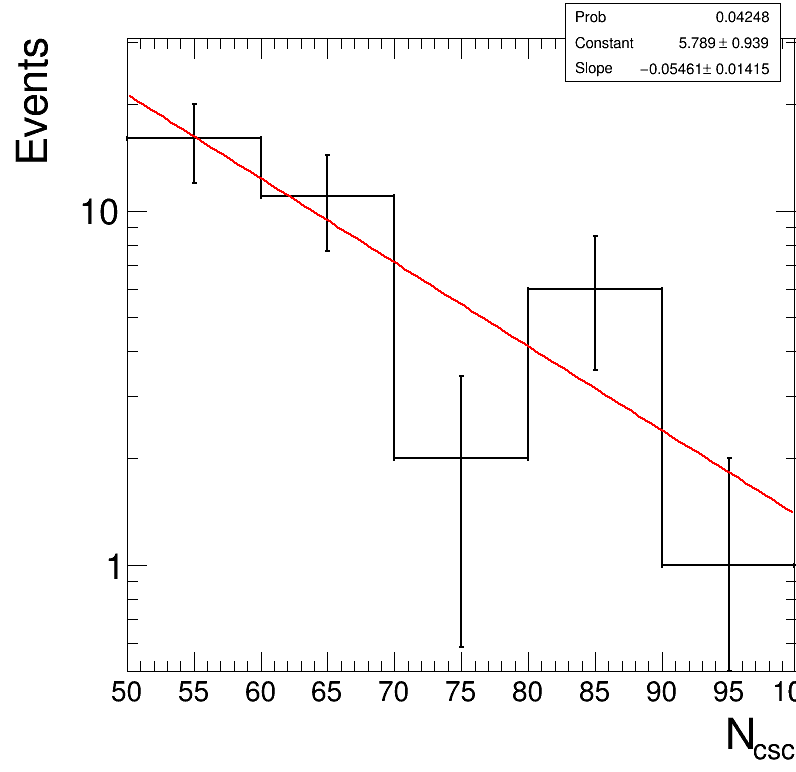

In [15]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot


k = 'data'


        
if category == 0:
    var = [cscClusterSize[k][:,0], cscClusterSize[k][:,1]]
    varName = ['cscRechitClusterSize1', 'cscRechitClusterSize2']
    xaxis = ['N_{csc}','N_{csc}']
elif category == 1:
    var = [dtClusterSize[k][:,0], dtClusterSize[k][:,1]]
    varName = ['dtRechitClusterSize1', 'dtRechitClusterSize2']
    xaxis = ['N_{dt}','N_{dt}']
else:
    var = [cscClusterSize[k], dtClusterSize[k]]
    varName = ['cscRechitClusterSize1', 'dtRechitClusterSize1']
    xaxis = ['N_{csc}','N_{dt}']
cut_index = 0
leg = rt.TLegend(0.6,0.77,0.90,0.92)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
rt.gStyle.SetOptFit(1011)
h = {}
r = {}
for j,v in enumerate(var):

        if j == 1:continue
        print("category:", category)
        print("region: ", region)

        cond = np.logical_and(var[0]<100, var[1]<100)
        
#         else: cond = np.logical_and(var[0]<80, var[1]<80)
#         cond = np.abs(jetMet_dPhiMin[k])>0.6
        if category <2: h[varName[j]] = create_TH1D( list(var[0][cond])+list(var[1][cond]), axis_title=[xaxis[j], 'Events'], name=k, binning=[5,50,100])
        else:h[varName[j]] = create_TH1D( v[cond], axis_title=[xaxis[j], 'Events'], name=k, binning=[5,50,100])
        leg.AddEntry(h[varName[j]], varName[j])
        h[varName[j]].GetXaxis().SetLabelSize(0.04)
        h[varName[j]].SetLineColor(std_color_list[0])
        r[varName[j]] = h[varName[j]].Fit('expo', 'LRSQ+', '', 50,100)
        a = r[varName[j]].Parameter(1)
        print(a)
        print('NRECHIT_CUT, Integral, efficiency, efficiencyUp, efficiencyDown, Integral*Eff^2')
        for N_RECHIT_CUT in [70, 80,90,100]:
            a = r[varName[j]].Parameter(1)
            eff = math.exp(N_RECHIT_CUT*a)/(math.exp(50*a)-math.exp(100*a))
            a = r[varName[j]].Parameter(1) + r[varName[j]].Error(1)
            effUp = math.exp(N_RECHIT_CUT*a)/(math.exp(50*a)-math.exp(100*a))
            a = r[varName[j]].Parameter(1) - r[varName[j]].Error(1)
            effDown = math.exp(N_RECHIT_CUT*a)/(math.exp(50*a)-math.exp(100*a))
            if category <2: print(N_RECHIT_CUT, h[varName[j]].Integral()/2, eff, effUp, effDown, h[varName[j]].Integral()/2*eff**2 )
            else: print(N_RECHIT_CUT, h[varName[j]].Integral(), eff, effUp, effDown, h[varName[j]].Integral()*eff**2 )
        for N_RECHIT_CUT in [70, 80,90,100]:
            a = r[varName[j]].Parameter(1)
            eff = (math.exp(50*a)-math.exp(N_RECHIT_CUT*a))/(math.exp(50*a)-math.exp(100*a))
            a = r[varName[j]].Parameter(1) + r[varName[j]].Error(1)
            effUp = (math.exp(50*a)-math.exp(N_RECHIT_CUT*a))/(math.exp(50*a)-math.exp(100*a))
            a = r[varName[j]].Parameter(1) - r[varName[j]].Error(1)
            effDown = (math.exp(50*a)-math.exp(N_RECHIT_CUT*a))/(math.exp(50*a)-math.exp(100*a))
            if category <2: print(N_RECHIT_CUT, h[varName[j]].Integral()/2, eff, effUp, effDown, h[varName[j]].Integral()/2*eff**2 )
            else: print(N_RECHIT_CUT, h[varName[j]].Integral(), eff, effUp, effDown, h[varName[j]].Integral()*eff**2 )
        h[varName[j]].GetFunction("expo").SetLineWidth(2)
        h[varName[j]].Draw('same E1')


c.SetRightMargin(0)
c.SetLogy()
# leg.Draw()
#     c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/abcdVar/v1p15_'+k+'_'+str(data_year)+'_'+varName[j]+'.png')
c.Draw()
# print(time.time()-start_t)
# expo: Exponential function with two parameters: f(x) = exp(p0+p1*x)



category: 2
region:  signal
1
0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


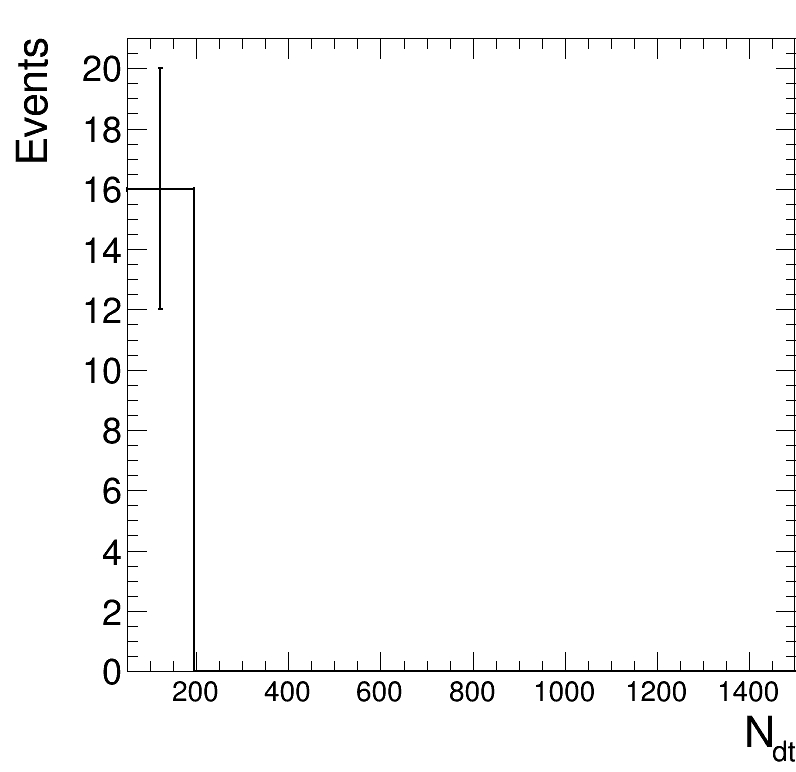

In [37]:
# unblinded B and D, restrict one Nrechit and plot the other

import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot


k = 'data'


        
if category == 0:
    var = [cscClusterSize[k][:,0], cscClusterSize[k][:,1]]
    varName = ['cscRechitClusterSize1', 'cscRechitClusterSize2']
    xaxis = ['N_{csc}','N_{csc}']
elif category == 1:
    var = [dtClusterSize[k][:,0], dtClusterSize[k][:,1]]
    varName = ['dtRechitClusterSize1', 'dtRechitClusterSize2']
    xaxis = ['N_{dt}','N_{dt}']
else:
    var = [cscClusterSize[k], dtClusterSize[k]]
    varName = ['cscRechitClusterSize1', 'dtRechitClusterSize1']
    xaxis = ['N_{csc}','N_{dt}']
cut_index = 0
leg = rt.TLegend(0.6,0.77,0.90,0.92)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
rt.gStyle.SetOptFit(1011)
h = {}
r = {}
for j,v in enumerate(var):

        if j == 0:continue
        print("category:", category)
        print("region: ", region)

        cond = np.logical_or(var[0]<100, var[1]<100)
        

        if category == 0: cond = var[1-j] < 100
        elif category == 1:  cond = var[1-j] < 80
        else: 
            if j == 0:cond = var[1-j] < 100
            else: cond = var[1-j] < 80
                
#         cond = np.logical_and(cond, (np.abs(cscRechitClusterEta[k])<2.3).sum()==2)
#         cond = np.logical_and(cond, np.logical_and(cscRechitClusterMuonVetoGlobal[k], cscRechitClusterMuonVetoPt[k]>=100).sum()==0) #kill only if both clusters are matched to muons

#         cond = np.logical_and(cond, np.abs(cscRechitClusterEta[k])<2.3)
#         cond = np.logical_and(cond, np.logical_not(np.logical_and(cscRechitClusterMuonVetoGlobal[k], cscRechitClusterMuonVetoPt[k]>=100))) #kill only if both clusters are matched to muons
#         print(np.count_nonzero(cond))
        if category == 0: h[varName[j]] = create_TH1D( var[j][cond], axis_title=[xaxis[j], 'Events'], name=k, binning=[10,50,250])
        elif category == 1: h[varName[j]] = create_TH1D( var[j][cond], axis_title=[xaxis[j], 'Events'], name=k, binning=[10,50,250])
        else:h[varName[j]] = create_TH1D( var[j][cond], axis_title=[xaxis[j], 'Events'], name=k, binning=[10,50,1500])
        print(np.count_nonzero(var[j][cond]>=100))
        print(np.count_nonzero(np.logical_and(var[1][cond]>=100, var[0][cond]>=80)))
#         else:h[varName[j]] = create_TH1D( v[cond], axis_title=[xaxis[j], 'Events'], name=k, binning=[5,50,100])
        leg.AddEntry(h[varName[j]], varName[j])
        h[varName[j]].GetXaxis().SetLabelSize(0.04)
        h[varName[j]].SetLineColor(std_color_list[0])
        
        
        ##### FIT
#         r[varName[j]] = h[varName[j]].Fit('expo', 'LRSQ+', '', 50,100)
#         a = r[varName[j]].Parameter(1)
#         print(a)
#         print('NRECHIT_CUT, Integral, efficiency, efficiencyUp, efficiencyDown, Integral*Eff^2')
#         for N_RECHIT_CUT in [70, 80,90,100]:
#             a = r[varName[j]].Parameter(1)
#             eff = math.exp(N_RECHIT_CUT*a)/(math.exp(50*a)-math.exp(100*a))
#             a = r[varName[j]].Parameter(1) + r[varName[j]].Error(1)
#             effUp = math.exp(N_RECHIT_CUT*a)/(math.exp(50*a)-math.exp(100*a))
#             a = r[varName[j]].Parameter(1) - r[varName[j]].Error(1)
#             effDown = math.exp(N_RECHIT_CUT*a)/(math.exp(50*a)-math.exp(100*a))
#             if category <2: print(N_RECHIT_CUT, h[varName[j]].Integral()/2, eff, effUp, effDown, h[varName[j]].Integral()/2*eff**2 )
#             else: print(N_RECHIT_CUT, h[varName[j]].Integral(), eff, effUp, effDown, h[varName[j]].Integral()*eff**2 )
#         for N_RECHIT_CUT in [70, 80,90,100]:
#             a = r[varName[j]].Parameter(1)
#             eff = (math.exp(50*a)-math.exp(N_RECHIT_CUT*a))/(math.exp(50*a)-math.exp(100*a))
#             a = r[varName[j]].Parameter(1) + r[varName[j]].Error(1)
#             effUp = (math.exp(50*a)-math.exp(N_RECHIT_CUT*a))/(math.exp(50*a)-math.exp(100*a))
#             a = r[varName[j]].Parameter(1) - r[varName[j]].Error(1)
#             effDown = (math.exp(50*a)-math.exp(N_RECHIT_CUT*a))/(math.exp(50*a)-math.exp(100*a))
#             if category <2: print(N_RECHIT_CUT, h[varName[j]].Integral()/2, eff, effUp, effDown, h[varName[j]].Integral()/2*eff**2 )
#             else: print(N_RECHIT_CUT, h[varName[j]].Integral(), eff, effUp, effDown, h[varName[j]].Integral()*eff**2 )
#         h[varName[j]].GetFunction("expo").SetLineWidth(2)

        h[varName[j]].Draw('same hist E1')
#         h[varName[j]].SetMaximum(60)
#         h[varName[j]].SetMaximum(0.1)


c.SetRightMargin(0)
# c.SetLogy()
# leg.Draw()
#     c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/abcdVar/v1p15_'+k+'_'+str(data_year)+'_'+varName[j]+'.png')
c.Draw()
# print(time.time()-start_t)
# expo: Exponential function with two parameters: f(x) = exp(p0+p1*x)



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


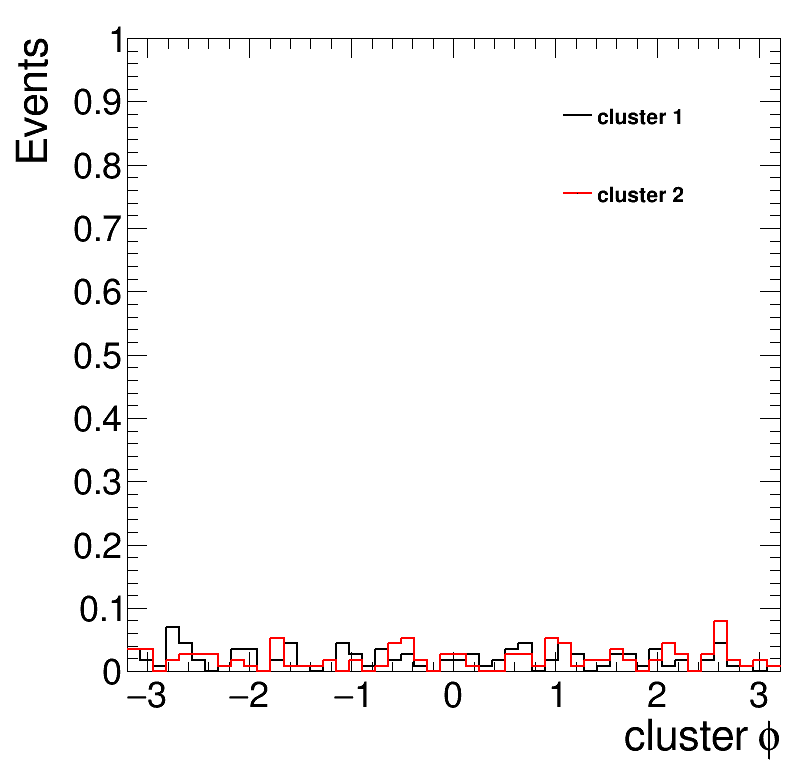

In [46]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

k = 'data'

leg = rt.TLegend(0.7,0.7,0.90,0.9)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
rt.gStyle.SetOptFit(1011)

h = {}

# h = create_TH2D( np.column_stack((dtRechitClusterPhi[k][:,0], dtRechitClusterPhi[k][:,1])), axis_title=['cluster #phi','MET #phi',\
#                                                                                                                 'Events'],name = 'x', binning=[10,-3.2,3.2,10,-3.2,3.2])
cond = runNum[k]<320673
cond = runNum[k]<323400
h[0] = create_TH1D( dtRechitClusterPhi[k][cond][:,0], axis_title=['cluster #phi', 'Events'],name = '0', binning=[50,-3.2,3.2])
h[1] = create_TH1D( dtRechitClusterPhi[k][cond][:,1], axis_title=['cluster #phi', 'Events'],name = '1', binning=[50,-3.2,3.2])

for i,k in enumerate(h.keys()):
    h[k].Scale(1./h[k].Integral())
    h[k].SetMaximum(1)
    h[k].SetLineColor(std_color_list[i])
    leg.AddEntry(h[k], 'cluster '+str(k+1))
    h[k].Draw('hist same')


leg.Draw()
c.SetLogz()
# if 'beamhalo' in k:
#     c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo/clusterPhi_metPhi.png')
#     c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/beamHalo/clusterPhi_metPhi.C')
# else:
#     c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/clusterPhi_metPhi.png')
#     c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/punchThrough/clusterPhi_metPhi.C')



c.Draw()

